In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [8]:
dataframe = pd.read_csv("Zomato_Data.csv")

In [10]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [12]:
dataframe.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


# Data Cleaning

In [15]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [17]:
dataframe['rate'] = dataframe['rate'].apply(handleRate)

In [19]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# EDA

In [31]:
# Which type of restaurant do the majority of customers order from?

Text(0, 0.5, 'No Of Orders')

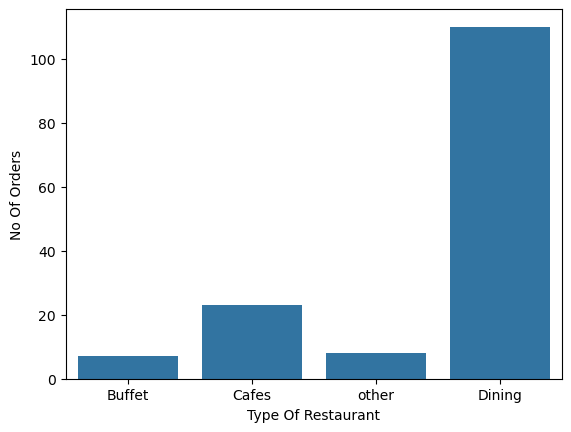

In [33]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type Of Restaurant")
plt.ylabel("No Of Orders")

In [35]:
# How  many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

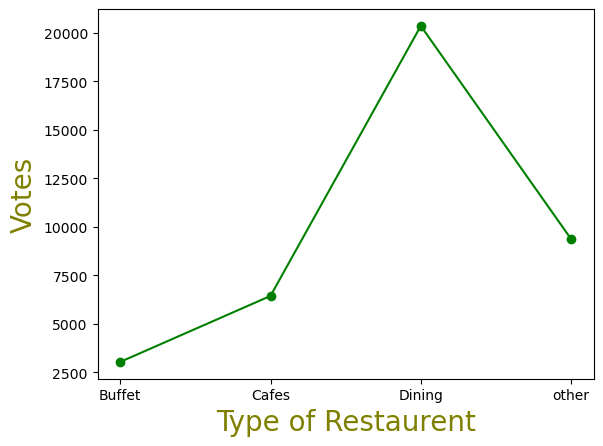

In [43]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of Restaurent", c="olive", size=20)
plt.ylabel("Votes", c="olive", size=20)

In [45]:
# What are the rating that the majority of restaurants have received

In [47]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


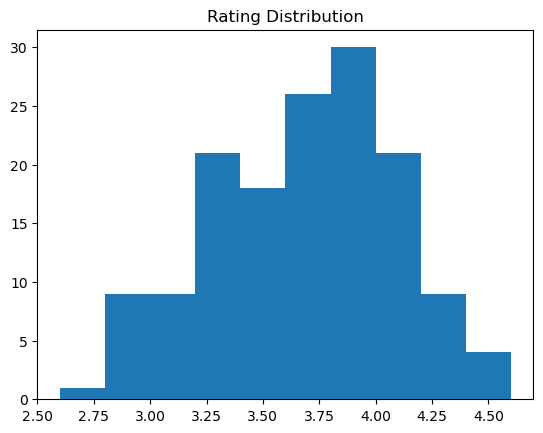

In [51]:
plt.hist(dataframe['rate'], bins = 10)
plt.title("Rating Distribution")
plt.show()

In [53]:
# Most couples order their foof online. What is their avg spending on each order

In [55]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [57]:
couple_data = dataframe['approx_cost(for two people)']

Text(0, 0.5, 'No Of Couples')

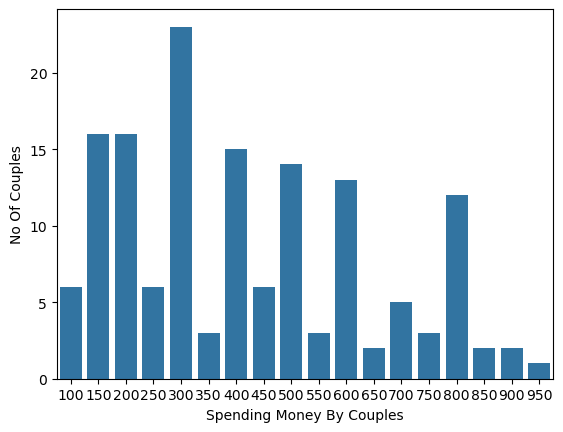

In [65]:
sns.countplot(x=couple_data)
plt.xlabel("Spending Money By Couples")
plt.ylabel("No Of Couples")

In [67]:
# Which mode has received the maximum rating

In [69]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

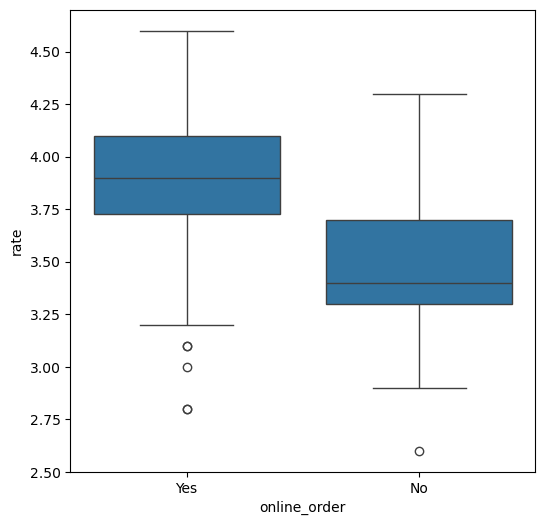

In [77]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data=dataframe)

In [79]:
# Which type of restaurent received more offline orders, so that Zomato can served to customers withh some good offers


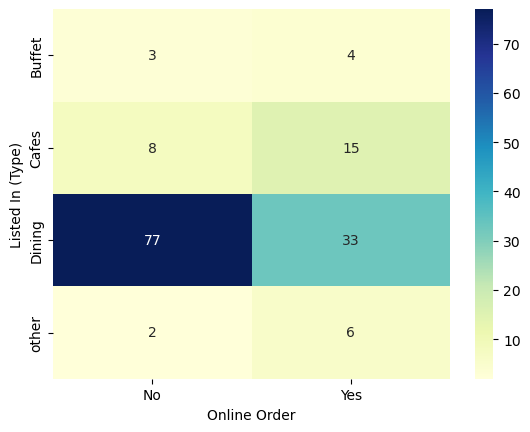

In [81]:
table = dataframe.pivot_table(index="listed_in(type)", columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()